# Netherlands eScience Center
## NLP pilot workshop - Day 1

### 1. Introduction

- Natural language processing (NLP) is an area of research and application that focuses on making human languages processable for computers
- Programming (artificial) languages are designed to be easily formalized into machine-readable instrucitons
- Natural languages are complex, highly ambiguous, and context dependent
- Workshop focuses on written English
- **Tokenization**: The task of segmenting text into meaningful units (e.g., words in most contexts)

Splitting an English sentence into words:

In [1]:
english_sentence = "Tokenization isn't always trivial."
english_words = english_sentence.split(" ")
print(english_words) # ['Tokenization', 'isn't', 'always', 'trivial.']
print(len(english_words)) # 4

['Tokenization', "isn't", 'always', 'trivial.']
4


Does this also work for Chinese?

In [2]:
chinese_sentence = "标记化并不总是那么简单"
chinese_words = chinese_sentence.split(" ")
print(chinese_words) # ['标记化并不总是那么简单']
print(len(chinese_words)) # 1

['标记化并不总是那么简单']
1


Use a tokenizer for Chinese instead:

In [3]:
import MicroTokenizer  # A popular Chinese text segmentation library
chinese_sentence = "标记化并不总是那么简单"
chinese_words = MicroTokenizer.cut(chinese_sentence)
print(chinese_words)
# ['mark', 'transform', 'and', 'no', 'always', 'so', 'simple']
print(len(chinese_words))  # Output: 7

['标记', '化', '并', '不', '总是', '那么', '简单']
7


Does this work with ChatGPT?

- LLM tokenizer do not always segment text into human-readable words

The importance of NLP fundamentals:

- Learn to formulate the problem
- What are the limitations of different tools (e.g., LLMs)?
- Can I use a simpler approach to solve the problem?
- How do I validate my results?

### 2. Language as data

- What aspects of textual data are relevant for your problem/appication?

What is a word?

- **Word type**: Word in the abstract
- **Word token**: Occurence of word in text
- Token and word are not synonymous but we will make a simplification and treat them interchangeably

Open a text file:

In [4]:
with open("data/84_frankenstein_clean.txt", "r") as f:
    text = f.read()
    
print(text[:100]) # First words of text
print(len(text)) # 417931

Letter 1 St. Petersburgh, Dec. 11th, 17-- TO Mrs. Saville, England You will rejoice to hear that no 
417931


Split text into "proto tokens":

In [5]:
proto_tokens = text.split()

print(proto_tokens[:40])
print(len(proto_tokens)) # 74942

['Letter', '1', 'St.', 'Petersburgh,', 'Dec.', '11th,', '17--', 'TO', 'Mrs.', 'Saville,', 'England', 'You', 'will', 'rejoice', 'to', 'hear', 'that', 'no', 'disaster', 'has', 'accompanied', 'the', 'commencement', 'of', 'an', 'enterprise', 'which', 'you', 'have', 'regarded', 'with', 'such', 'evil', 'forebodings.', 'I', 'arrived', 'here', 'yesterday,', 'and', 'my']
74942


To download SpaCy model:

In [6]:
! python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Load the SpaCy model and process the entire text:

In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(text)

Get the tokens from the processed text:

In [8]:
tokens = [token for token in doc]
print(tokens[:40])
print(len(tokens)) # 85713

[Letter, 1, St., Petersburgh, ,, Dec., 11th, ,, 17, -, -, TO, Mrs., Saville, ,, England, You, will, rejoice, to, hear, that, no, disaster, has, accompanied, the, commencement, of, an, enterprise, which, you, have, regarded, with, such, evil, forebodings, .]
85713


There is a difference between the SpaCy tokenization and splitting the text by space.

Print the SpaCy token objects:

In [9]:
print(type(doc))
print(type(tokens[0]))

<class 'spacy.tokens.doc.Doc'>
<class 'spacy.tokens.token.Token'>


Retrieve all actual words (i.e., alpha-numeric tokens):

In [10]:
only_words = [token for token in doc if token.is_alpha]

print(only_words[:40])
print(len(only_words)) # 75062

[Letter, Petersburgh, TO, Saville, England, You, will, rejoice, to, hear, that, no, disaster, has, accompanied, the, commencement, of, an, enterprise, which, you, have, regarded, with, such, evil, forebodings, I, arrived, here, yesterday, and, my, first, task, is, to, assure, my]
75062


Retrieve only verbs:

In [11]:
only_verbs = [token for token in doc if token.pos_ == "VERB"]
print(only_verbs[:40])

[rejoice, hear, accompanied, regarded, arrived, assure, increasing, walk, feel, braces, fills, understand, travelled, advancing, gives, Inspirited, become, try, persuaded, presents, skirting, diffusing, put, preceding, banished, sailing, wafted, surpassing, discovered, expected, discover, attracts, regulate, require, render, seeming, satiate, visited, tread, imprinted]


Retrieve the sentences:

In [12]:
sentences = [sent.text for sent in doc.sents]
print(sentences[:5])
print(len(sentences)) # 3317

['Letter 1 St. Petersburgh, Dec. 11th, 17-- TO Mrs. Saville, England You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.', 'I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.', 'I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.', 'Do you understand this feeling?', 'This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes.']
3317


Retrieve the named entities (e.g., names, places, dates):

In [13]:
for ent in doc.ents[:10]:
    print(ent.label_, ent.text) # The 'label_' attribute shows what type of entity this is (e.g., person vs. date)

DATE Dec. 11th
CARDINAL 17
PERSON Saville
GPE England
DATE yesterday
ORDINAL first
GPE London
PERSON Petersburgh
PERSON Margaret
CARDINAL thousand


### 3. Pretraining vs finetuning:

- Using a **pretrained model**: Taking a (publicly available) model that has already been trained to solve a specific task and applying it as is to new data
- **Finetuning**: Adapting a pretrained model to solve a new task or adjusting it to perform well on new data

**NLP Task**: A well-defined problem that involves computational algorithms to achieve a linguistic or functional objective

**Unsupervised tasks**: Learn generalizable structure/patters from data without labeled targets

**Supervised tasks**: Learn generalizable structure/patterns from data with labeled targets

### 4. Broad NLP task categories:

- Text classification: A single target label for a chunk of text; text features are used to classify the text
- Token classification: A single target label for each token; the surrounding tokens are used to classify the token
- Language modelling: Predicting the next word given a sequence of previous words
- Text generation: Learn to generate a target sequence given a source sequence a context

### 5. A Primer on Linguistics

Natural language:

- Compositional: Structures are more than the sum of their parts
- Ambinguous: Symbols change meaning depending on context
- Discrete: Words are arbitrary non-measurable symbols
- Sparse: Concrete phenomena occur only a handful of times

Levels of language:

- Pragmatics: Meaning in context/discourse
- Semantics: Literal meaning
- Syntax: Phrases and sentences
- Morphology: Words and signs
- Phonology: Phonemes and cheremes
- Phonetics: Each and sign component

Mini text:

In [14]:
# A mini-corpus where our target words appear
text = """
I am hungry. Should I eat delicious pizza?
Or maybe I should eat a juicy hamburger instead.
Many people like to eat pizza because is tasty, they think pizza is delicious as hell!
My friend prefers to eat a hamburger and I agree with him.
We will drive our car to the restaurant to get the succulent hamburger.
Right now, our cat sleeps on the mat so we won't take him.
I did not wash my car, but at least the car has gasoline.
Perhaps when we come back we will take out the cat for a walk.
The cat will be happy then.
"""

Load SpaCy pipeline:

In [15]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

Extract the tokens:

In [16]:
words = [token.text for token in doc if token.is_alpha]

Count words:

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

word_count = Counter(words).most_common() # Sort by frequency
print(word_count[:10])

[('I', 5), ('the', 5), ('eat', 4), ('to', 4), ('pizza', 3), ('a', 3), ('hamburger', 3), ('will', 3), ('car', 3), ('cat', 3)]


Plot word frequencies:

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70],
 [Text(0, 0, 'I'),
  Text(1, 0, 'the'),
  Text(2, 0, 'eat'),
  Text(3, 0, 'to'),
  Text(4, 0, 'pizza'),
  Text(5, 0, 'a'),
  Text(6, 0, 'hamburger'),
  Text(7, 0, 'will'),
  Text(8, 0, 'car'),
  Text(9, 0, 'cat'),
  Text(10, 0, 'we'),
  Text(11, 0, 'delicious'),
  Text(12, 0, 'is'),
  Text(13, 0, 'him'),
  Text(14, 0, 'our'),
  Text(15, 0, 'take'),
  Text(16, 0, 'am'),
  Text(17, 0, 'hungry'),
  Text(18, 0, 'Should'),
  Text(19, 0, 'Or'),
  Text(20, 0, 'maybe'),
  Text(21, 0, 'should'),
  Text(22, 0, 'juicy'),
  Text(23, 0, 'instead'),
  Text(24, 0, 'Many'),
  Text(25, 0, 'peo

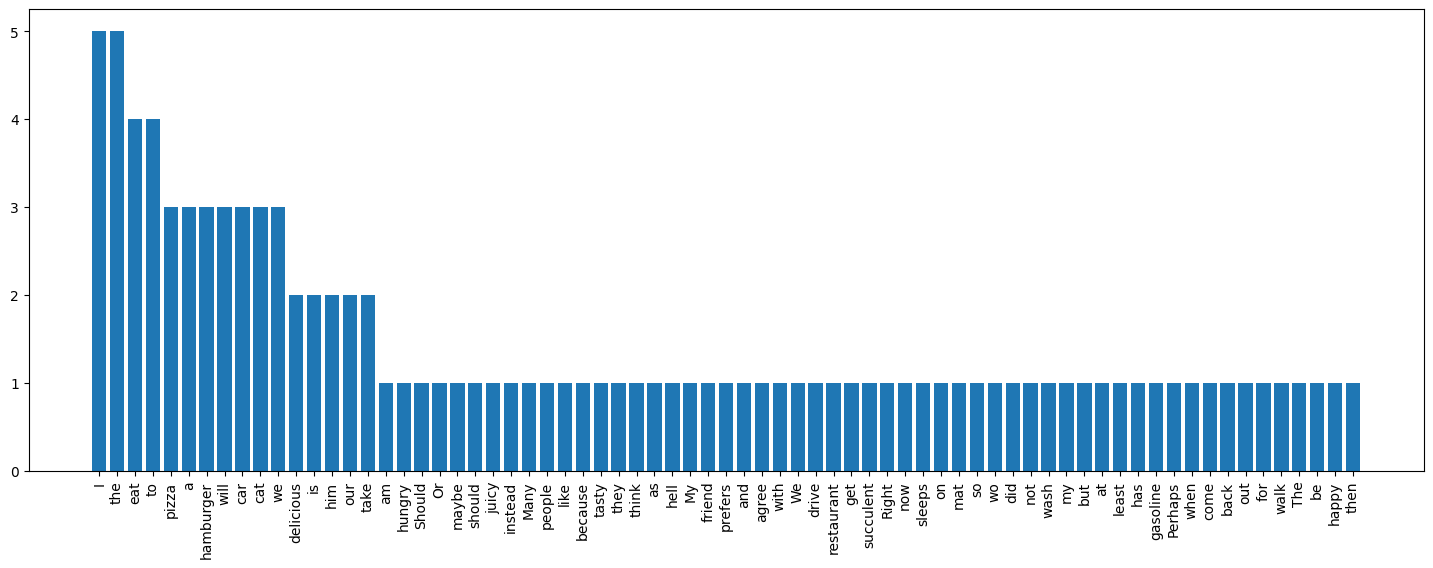

In [18]:
tokens = [item[0] for item in word_count]
frequencies = [item[1] for item in word_count]

plt.figure(figsize=(18, 6))
plt.bar(tokens, frequencies)
plt.xticks(rotation=90)

Typical word frequency distribution: Few very frequent words (personal pronouns, e.g., "I"), many infrequent words (content words)

In [19]:
words = [token.lower_ for token in doc if token.is_alpha]

Extract meaning from target words through co-occurence:

In [20]:
target_words = ["pizza", "hamburger", "car", "cat"]
co_occurence = {word: [] for word in target_words}

window_size = 3

for i, word in enumerate(words):
    if word in target_words:
        start = max(0, i - window_size)
        end = min(len(words), i + window_size)
        context = words[start:i] + words[i+1:end]
        
        co_occurence[word].extend(context)
        
print(co_occurence)

{'pizza': ['i', 'eat', 'delicious', 'or', 'maybe', 'like', 'to', 'eat', 'because', 'is', 'tasty', 'they', 'think', 'is', 'delicious'], 'hamburger': ['eat', 'a', 'juicy', 'instead', 'many', 'to', 'eat', 'a', 'and', 'i', 'get', 'the', 'succulent', 'right', 'now'], 'car': ['will', 'drive', 'our', 'to', 'the', 'not', 'wash', 'my', 'but', 'at', 'at', 'least', 'the', 'has', 'gasoline'], 'cat': ['right', 'now', 'our', 'sleeps', 'on', 'take', 'out', 'the', 'for', 'a', 'a', 'walk', 'the', 'will', 'be']}


Remove stop words from context before co-occurence:

In [21]:
from spacy.lang.en.stop_words import STOP_WORDS
co_occurence = {word: [] for word in target_words}

window_size = 3

for i, word in enumerate(words):
    if word in target_words:
        start = max(0, i - window_size)
        end = min(len(words), i + window_size)
        context = words[start:i] + words[i+1:end]
        context = [w for w in context if w.lower() not in STOP_WORDS]

        co_occurence[word].extend(context)

print(co_occurence)


{'pizza': ['eat', 'delicious', 'maybe', 'like', 'eat', 'tasty', 'think', 'delicious'], 'hamburger': ['eat', 'juicy', 'instead', 'eat', 'succulent', 'right'], 'car': ['drive', 'wash', 'gasoline'], 'cat': ['right', 'sleeps', 'walk']}


Compute contextual fingerprint of target words

In [22]:
for word, context_list in co_occurence.items():
    fingerprint = Counter(context_list).most_common(5)
    print(word, fingerprint)

pizza [('eat', 2), ('delicious', 2), ('maybe', 1), ('like', 1), ('tasty', 1)]
hamburger [('eat', 2), ('juicy', 1), ('instead', 1), ('succulent', 1), ('right', 1)]
car [('drive', 1), ('wash', 1), ('gasoline', 1)]
cat [('right', 1), ('sleeps', 1), ('walk', 1)]


### 6. From Words to Vectors: Preprocessing

Open text file and analyse formatting. Consider what you need to do to process the file for input into your model / NLP pipeline:


In [23]:
filename = "data/84_frankenstein_or_the_modern_prometheus.txt"
with open(filename, 'r', encoding='utf-8') as file:
    text = file.read()
print(text[:300]) # print the first 300 characters

Letter 1


St. Petersburgh, Dec. 11th, 17--

TO Mrs. Saville, England

You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings.  I arrived here yesterday, and my first task is to assure
my dear sister of my welfar


Flatten content (remove newlines / blank spaces):

In [24]:
text_flat = text.replace("\n", " ")
print(text_flat[:300]) # print the first 300 characters

Letter 1   St. Petersburgh, Dec. 11th, 17--  TO Mrs. Saville, England  You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.  I arrived here yesterday, and my first task is to assure my dear sister of my welfar


Use spacy to tokenize and iterate through tokens:

In [25]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

tokens = [token.text for token in doc]
print(tokens[:50])

['Letter', '1', '\n\n\n', 'St.', 'Petersburgh', ',', 'Dec.', '11th', ',', '17', '-', '-', '\n\n', 'TO', 'Mrs.', 'Saville', ',', 'England', '\n\n', 'You', 'will', 'rejoice', 'to', 'hear', 'that', 'no', 'disaster', 'has', 'accompanied', 'the', '\n', 'commencement', 'of', 'an', 'enterprise', 'which', 'you', 'have', 'regarded', 'with', 'such', 'evil', '\n', 'forebodings', '.', ' ', 'I', 'arrived', 'here', 'yesterday']


Print sentences and type:

In [26]:
sentences_normal = [sent.text for sent in doc.sents]
for sent in sentences_normal[:10]:
    print(sent, type(sent))
    print('--------')

Letter 1


St. Petersburgh, Dec. 11th, 17--

TO Mrs. Saville, England

You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings.   <class 'str'>
--------
I arrived here yesterday, and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking.

 <class 'str'>
--------
I am already far north of London, and as I walk in the streets of
Petersburgh, I feel a cold northern breeze play upon my cheeks, which
braces my nerves and fills me with delight.   <class 'str'>
--------
Do you understand this
feeling?   <class 'str'>
--------
This breeze, which has travelled from the regions towards
which I am advancing, gives me a foretaste of those icy climes.
 <class 'str'>
--------
Inspirited by this wind of promise, my daydreams become more fervent
and vivid.   <class 'str'>
--------
I try in vain to be persuaded that the pole is the seat of
frost and desolat

In [27]:
doc_flat = nlp(text_flat)
sents_sample = list(doc_flat.sents)[:10]
for sent in sents_sample:
    print('Sentence:', sent)
    for token in sent:
        print('Token:', token)

Sentence: Letter 1   St. Petersburgh, Dec. 11th, 17--  TO Mrs. Saville, England  You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.  
Token: Letter
Token: 1
Token:   
Token: St.
Token: Petersburgh
Token: ,
Token: Dec.
Token: 11th
Token: ,
Token: 17
Token: -
Token: -
Token:  
Token: TO
Token: Mrs.
Token: Saville
Token: ,
Token: England
Token:  
Token: You
Token: will
Token: rejoice
Token: to
Token: hear
Token: that
Token: no
Token: disaster
Token: has
Token: accompanied
Token: the
Token: commencement
Token: of
Token: an
Token: enterprise
Token: which
Token: you
Token: have
Token: regarded
Token: with
Token: such
Token: evil
Token: forebodings
Token: .
Token:  
Sentence: I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.  
Token: I
Token: arrived
Token: here
Token: yesterday
Token: ,
Token: and
Token: m

Different ways of lowercasing and motivation for this choice of preprocessing.

In [28]:
# 1
lower_text = text_flat.lower()
print(lower_text[:5])

# 2
lower_text = [token.lower_ for token in doc_flat]
print(lower_text[:5])

normal_text = [token.text for token in doc_flat]
print(normal_text[:5])

lette
['letter', '1', '  ', 'st.', 'petersburgh']
['Letter', '1', '  ', 'St.', 'Petersburgh']


How lowercasing affects Named Entity Recognition:

In [29]:
str1 = "My next laptop will be from Apple, Will said." 
str2 = "my next laptop will be from apple, will said."

ents1 = [ent.text for ent in nlp(str1).ents]
ents2 = [ent.text for ent in nlp(str2).ents]

print(ents1)
print(ents2)

['Apple', 'Will']
[]


Lemmatization:

In [30]:
lemmas = [token.lemma_ for token in doc_flat]
print(lemmas[:50])

['letter', '1', '  ', 'St.', 'Petersburgh', ',', 'Dec.', '11th', ',', '17', '-', '-', ' ', 'to', 'Mrs.', 'Saville', ',', 'England', ' ', 'you', 'will', 'rejoice', 'to', 'hear', 'that', 'no', 'disaster', 'have', 'accompany', 'the', 'commencement', 'of', 'an', 'enterprise', 'which', 'you', 'have', 'regard', 'with', 'such', 'evil', 'foreboding', '.', ' ', 'I', 'arrive', 'here', 'yesterday', ',', 'and']


Custom defined stop words:

In [31]:
STOP_WORDS = ['the','you','will', 'commencement']
content_words = []

for lemma in lemmas:
    if lemma not in STOP_WORDS:
        content_words.append(lemma)
        
print(content_words[:50])

['letter', '1', '  ', 'St.', 'Petersburgh', ',', 'Dec.', '11th', ',', '17', '-', '-', ' ', 'to', 'Mrs.', 'Saville', ',', 'England', ' ', 'rejoice', 'to', 'hear', 'that', 'no', 'disaster', 'have', 'accompany', 'of', 'an', 'enterprise', 'which', 'have', 'regard', 'with', 'such', 'evil', 'foreboding', '.', ' ', 'I', 'arrive', 'here', 'yesterday', ',', 'and', 'my', 'first', 'task', 'be', 'to']


Create rule based sentiment classifier:

In [32]:
sentences = [sent.text for sent in doc_flat.sents]

positive_words = ['happy', 'excited', 'delighted', 'content', 'love', 'enjoyment']
negative_words = ['unhappy', 'sad', 'anxious', 'miserable', 'fear', 'horror']

classified_sentences = []

for sent in sentences:
    if any(word in sent.lower() for word in positive_words):
        classified_sentences.append((sent, "POSITIVE"))
    elif any(word in sent.lower() for word in negative_words):
        classified_sentences.append((sent, "NEGATIVE"))
    else:
        classified_sentences.append((sent, "NEUTRAL"))

Save results of rule-based classifier to CSV file:

In [33]:
import pandas as pd

df = pd.DataFrame(classified_sentences, columns=['sentence', 'label'])
df.to_csv('naive_classifier_results.tsv', sep='\t')

### 7. From Words to Vectors: Word embeddings

In [34]:
import gensim.downloader
available_models = gensim.downloader.info()['models'].keys()
print(list(available_models))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Vocabulary size:

In [35]:
w2v_model = gensim.downloader.load('word2vec-google-news-300')
print(len(w2v_model.key_to_index.keys()))

3000000


Dimensionality:

In [36]:
print(w2v_model.vector_size)

300


Specific vector for specific token:

In [37]:
print(w2v_model['car'][:10])

[ 0.13085938  0.00842285  0.03344727 -0.05883789  0.04003906 -0.14257812
  0.04931641 -0.16894531  0.20898438  0.11962891]


Tokens not present in vocab:

In [38]:
print(w2v_model['bazzinga'][:10])

KeyError: "Key 'bazzinga' not present"

Text or word similarity (measure using cosine similarity):

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

car_vector = w2v_model['car']
cat_vector = w2v_model['cat']

similarity = cosine_similarity([car_vector], [cat_vector])

print(similarity)

[[0.21528186]]


In [40]:
similarity = cosine_similarity([w2v_model['hamburger']], [w2v_model['pizza']])
print(similarity)

[[0.61536765]]


In [41]:
print(w2v_model.most_similar('pizza', topn=10))
print(w2v_model.most_similar('lover', topn=10))

[('pizzas', 0.7863470911979675), ('Domino_pizza', 0.7342829704284668), ('Pizza', 0.6988078355789185), ('pepperoni_pizza', 0.6902607083320618), ('sandwich', 0.6840401887893677), ('burger', 0.6569692492485046), ('sandwiches', 0.6495091319084167), ('takeout_pizza', 0.6491535902023315), ('gourmet_pizza', 0.6400628089904785), ('meatball_sandwich', 0.6377009749412537)]
[('paramour', 0.6798686385154724), ('mistress', 0.6387110352516174), ('boyfriend', 0.6375402212142944), ('lovers', 0.6339589953422546), ('girlfriend', 0.6140860915184021), ('beau', 0.609399676322937), ('fiancé', 0.5994566679000854), ('soulmate', 0.5993717312812805), ('hubby', 0.5904166102409363), ('fiancée', 0.5888950228691101)]


Vector operations (king + woman - man = queen):

In [42]:
w2v_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

Creating own Word2Vec model:

In [43]:
import spacy
from gensim.models import Word2Vec

spacy_model = spacy.load('en_core_web_sm')

with open('data/84_frankenstein_clean.txt') as f:
    book_text = f.read()

Vocabulary:

In [44]:
book_doc = spacy_model(book_text)
clean_tokens = [tok.text.lower() for tok in book_doc if tok.is_alpha and not tok.is_stop]
print(clean_tokens[:50])

['letter', 'petersburgh', 'saville', 'england', 'rejoice', 'hear', 'disaster', 'accompanied', 'commencement', 'enterprise', 'regarded', 'evil', 'forebodings', 'arrived', 'yesterday', 'task', 'assure', 'dear', 'sister', 'welfare', 'increasing', 'confidence', 'success', 'undertaking', 'far', 'north', 'london', 'walk', 'streets', 'petersburgh', 'feel', 'cold', 'northern', 'breeze', 'play', 'cheeks', 'braces', 'nerves', 'fills', 'delight', 'understand', 'feeling', 'breeze', 'travelled', 'regions', 'advancing', 'gives', 'foretaste', 'icy', 'climes']


Train Word2Vec model:

In [45]:
model = Word2Vec([clean_tokens], sg=0, vector_size=300, window=5, min_count=1, workers=4)

Save to file:

In [46]:
model.save('word2vec_mini_books.model')

Load and test:

In [47]:
model = Word2Vec.load('word2vec_mini_books.model')
w2v = model.wv
w2v.most_similar('monster')

[('torturing', 0.2048884779214859),
 ('choked', 0.19488446414470673),
 ('temper', 0.19468455016613007),
 ('plains', 0.19239673018455505),
 ('certainty', 0.18826884031295776),
 ('la', 0.18575136363506317),
 ('earnestly', 0.18528547883033752),
 ('foldings', 0.18480172753334045),
 ('disgust', 0.17243827879428864),
 ('forgetting', 0.16964495182037354)]

Not in vocabulary:

In [48]:
w2v.most_similar('pizza')

KeyError: "Key 'pizza' not present in vocabulary"

## 🔧 Exercises

### Challenge 1.1: NLP in the Real World

*Name three to five tools/products that you use on a daily basis and that you think leverage NLP techniques. To do this exercise you may make use of the Web.*

- Writing text in Word (word finisher)
- ChatGPT, internet browsers, social media, google scholar
- Chatbots (Bol "help" etc), Google Translate, Product search (Bol, Amazon, etc), Typing hints
- Generative AI models (Claude, ChatGPT, Gemini), Google search, autocomplete on phone
- Social Media, Search Engines, GenAI
- LinkedIn search, Google scholar search, generative AI
- GoogleTranslate, recommentation systems on shopping websites, auto-captions on YouTube
- WhisperX, transcribe video/audio
- Search engines, social media, predictive text/text suggestions
- Deep Seek
- ChatGPT
- Google Translate
- Transcription of Voice
- Chatbots, Google search, Grammerly



### Challenge 1.2: Compute an aggregate stat with spaCy

*Use the spaCy Doc object to compute an aggregate statistic about the Frankenstein book. HINT: Use the python `set`, `dictionary` or `Counter` objects to hold the accumulative counts. For example:*

- Give the list of the 20 most common verbs in the book

In [49]:
from collections import Counter

verbs = [ verb for verb in doc if verb.pos_ == 'VERB']
verb_texts = [verb.text for verb in verbs]
verb_freq =  Counter(verb_texts)
print(verb_freq.most_common(20))

[('said', 102), ('saw', 94), ('found', 87), ('had', 78), ('felt', 77), ('made', 70), ('passed', 67), ('heard', 62), ('thought', 56), ('appeared', 56), ('became', 55), ('have', 55), ('see', 50), ('feel', 49), ('know', 48), ('came', 41), ('entered', 38), ('seemed', 36), ('took', 36), ('possessed', 35)]


- How many different Places are identified in the book? (Label = GPE)
- How many different entity categories are in the book?
- Who are the 10 most mentioned PERSONs in the book?
- Or any other similar aggregate you want...
- Top 15 places mentioned (based on GPE)

**Example solutions:**

Finding all unique entity types in the text:

In [50]:
entity_types = set()

for ent in doc.ents:
    entity_types.add(ent.label_)
    
print(entity_types)
print(len(entity_types)) # 15

{'CARDINAL', 'NORP', 'LAW', 'PRODUCT', 'FAC', 'EVENT', 'ORDINAL', 'ORG', 'DATE', 'GPE', 'LOC', 'LANGUAGE', 'QUANTITY', 'PERSON', 'WORK_OF_ART', 'TIME'}
16


Count all verbs in text:

In [51]:
from collections import Counter

only_verbs = [token.text for token in doc if token.pos_ == "VERB"]
verb_count = Counter(only_verbs)
print(verb_count)

Counter({'said': 102, 'saw': 94, 'found': 87, 'had': 78, 'felt': 77, 'made': 70, 'passed': 67, 'heard': 62, 'thought': 56, 'appeared': 56, 'became': 55, 'have': 55, 'see': 50, 'feel': 49, 'know': 48, 'came': 41, 'entered': 38, 'seemed': 36, 'took': 36, 'possessed': 35, 'make': 35, 'left': 35, 'discovered': 33, 'taken': 33, 'believe': 33, 'continued': 33, 'become': 32, 'come': 32, 'lost': 32, 'remained': 32, 'knew': 32, 'gave': 32, 'resolved': 31, 'return': 31, 'returned': 31, 'arrived': 29, 'loved': 29, 'looked': 29, 'began': 28, 'read': 28, 'placed': 28, 'brought': 28, 'endeavoured': 28, 'think': 27, 'lay': 27, 'beheld': 27, 'replied': 27, 'perceived': 26, 'called': 26, 'expressed': 26, 'spent': 25, 'sat': 25, 'was': 25, 'seek': 25, 'died': 25, 'desired': 25, 'turned': 24, 'occupied': 24, 'fixed': 24, 'spoke': 24, 'lived': 23, 'endured': 23, 'find': 23, 'say': 23, 'concerning': 23, 'destroyed': 23, 'die': 23, 'filled': 23, 'appear': 22, 'quitted': 22, 'love': 22, 'live': 22, 'followed

### Challenge 1.3: NLP Task examples

Look at the NLP Task taxonomy described above and write down a couple of examples of (Input, Output) instance pairs that you would need in order to train a supervised model for your chosen task.

For Example: the task of labeling an E-mail as spam or not-spam

Label_Set: [SPAM, NO-SPAM]

- Try to extract [compentences](https://competentnl.nl/) from resumes.
    - Input: Resume text
    - Output labels: competences that are present in a resume
    - Task type: Named entity recognition
- ~~Try to cluster bug reports into categories~~ (this was unsupervised)
    - ~~Input: Bug report~~
    - ~~Output: Bug classification~~
    - ~~Task type: Topic Modellign~~
-  text similarity 
**Input** Text 1: "Hello, how are you" ; Text 2: "Greetings, how is your day?""
**Output** SIMILARITY - 70% 

Named-entity recognition
Schema 
entity = {"gene", "metabolite", "protein", "trait"}
relation_type = {"involved_in", "encodes"}
sentence = "gene fas is involved in regulating fruit weight in tomato by encoding xyz"

Use a information extractor (UIE) model and train on sentences and highlighting entities and relations as labels 

Training Instances:

Information retrieval (for relevant course text)
    Output labels: [Relevant, Not-relevant] 
    Input (example): "I ate an apple today"
    Output: Not-relevant

Labels: [AI-boomer, AI-doomer]

Text: AI will perform many tasks currently done by humans, and thus free up leisure time for humans. 
Label: AI-boomer

Text: AI will take away jobs and cause mass unemployment
Label: AI-doomer

**Input:** "Dear Sir, you've been awarded a grant of 10 million Euros and it is only available today. Please contact me ASAP!" **Output:** SPAM
**Input:** "Dear Madam, as agreed by phone here is the sales report for last month." **Output:** NO-SPAM

Task example: sentiment analysis of restaurant reviews:
- Labelled input data: reviews + label (positive/ negative/ neutral)

### Challenge 1.4: Discuss linguistic properties of sentences

Discuss what the following sentences mean. What level of ambiguity do they represent?:

-   "The door is unlockable from the inside." vs "Unfortunately, the cabinet is unlockable, so we can't secure it"
-   "I saw the *cat with the stripes*" vs "I saw the cat *with the telescope*"
-   "Please don’t drive the cat to the vet!" vs "Please don’t drive the car tomorrow!"

-   "I never said she stole my money." (re-write this sentence multiple times and each time emphasize a different word in italics).

Solutions:

-   "Un-lockable vs Unlock-able" is a **Morphological** ambiguity: Same word form, two possible meanings
-   "I saw the cat with the telescope" has a **Syntactic** ambiguity: Same sentence structure, different properties
-   "drive the cat" vs "drive the car" shows a **Semantic** ambiguity: Syntactically identical sentences that imply quite different actions.
-   "I NEVER said she stole my money." is a **Pragmatic** ambiguity: Meaning relies on word emphasis

### Challenge 2.1: Similarity of word pairs in Word2Vec

Think of different word pairs and try to guess how close or distant they will be from each other. Use the similarity measure from the word2vec module to compute the metric and discuss if this fits your expectations. If not, can you come up with a reason why this was not the case?

Suggestions:(democracy, democratic), (queen, princess), (love, hate), (love, lover).

- My example (dog, cat) and (cow, pig) should be closer than (cow, dog) and (pig,cat)

#### Solution

Some interesting cases include synonyms, antonyms and morphologically related words:

In [52]:
print(w2v_model.similarity('democracy', 'democratic'))
print(w2v_model.similarity('queen', 'princess'))
print(w2v_model.similarity('love', 'hate')) #!! (think of "I love X" and "I hate X")
print(w2v_model.similarity('love', 'lover'))

0.86444813
0.7070532
0.6003957
0.48608577


### ADVANCED Challenge 2.2 (Only if there is time):

Let's apply this step by step on a longer text. In this case, because we are learning the process, our corpus will be only one book but in reality we would like to train a network with thousands of them. We will use two books: Frankenstein and Dracula to train a model of word vectors.

Write the code to follow the proposed pipeline and train the word2vec model. The proposed pipeline for this task is: 

- load the text files
- tokenize files
- keep only alphanumerical tokens
- lemmatize words
- Remove stop words
- Train a Word2Vec model (feed the clean tokens to the `Word2Vec` object) with `vector_size=50`
- Save the trained model

#### Solution

In [53]:
import spacy
from gensim.models import Word2Vec 

def process_book(book_filename: str, spacy_model: spacy.lang) -> list[str]:
    with open(book_filename) as f:
        book_text = f.read()
    
    book_doc = spacy_model(book_text)
    valid_tokens = [tok for tok in book_doc if tok.is_alpha and not tok.is_stop]
    lemmas = [tok.lemma_ for tok in valid_tokens] 
    return lemmas

nlp = spacy.load("en_core_web_sm")
# Load the Tokens
franken_lemmas = process_book("data/84_frankenstein_clean.txt", nlp)
dracula_lemmas = process_book("data/345_dracula_clean.txt", nlp)

# Train our own model
spooky_model = Word2Vec([franken_lemmas, dracula_lemmas], sg=0 , vector_size=50, window=5, min_count=1, workers=4)

# Test the vectors
print(len(spooky_model.wv['Frankenstein']))
print(len(spooky_model.wv['Dracula']))
print(spooky_model.wv['Frankenstein'][:30])
print(spooky_model.wv.most_similar("Frankenstein"))

50
50
[ 0.01082971  0.00455666 -0.01325974  0.00876814  0.00119911 -0.02091524
  0.0167659   0.0180658   0.00770095 -0.01120892 -0.02007811 -0.01219268
 -0.01152517 -0.00082226 -0.01188423 -0.00326063 -0.01391451  0.00997829
  0.00104196 -0.00872085  0.00119395  0.02620064 -0.00639803 -0.00883029
  0.01463609 -0.00749234 -0.02726568 -0.01006082 -0.01598681 -0.01646774]
[('corner', 0.5929452180862427), ('good', 0.5604961514472961), ('suppose', 0.5501366257667542), ('grow', 0.5442125797271729), ('hear', 0.5396482944488525), ('word', 0.526745617389679), ('till', 0.5252916216850281), ('white', 0.5252293944358826), ('unconscious', 0.5237153172492981), ('rush', 0.5208024978637695)]


In [54]:
print(spooky_model.wv.similarity('Frankenstein', 'Dracula'))

0.20785868


## Resources

- NL eScience Center [Digital Skills Programme](https://www.esciencecenter.nl/digital-skills/) & newsletter
- [Research Software Training](https://researchsoftwaretraining.nl/): Network of research software trainers in the Netherlands
- [RSE-NL](https://nl-rse.org/): Community of research software engineers in the Netherlands
- [TikTokenizer](https://tiktokenizer.vercel.app/): a tokenization visualization tool designed for large language models (LLMs) such as GPT, Llama, and Qwen.
- [SpaCy models](https://spacy.io/models/en#en_core_web_sm): Available trained pipelines in SpaCy
- [SpaCy entity visualizer](https://spacy.io/usage/visualizers#ent): The entity visualizer, ent, highlights named entities and their labels in a text.
- Lesson Material:
    - [Course](https://carpentries-incubator.github.io/Natural-language-processing/)
    - [Slides](https://github.com/carpentries-incubator/Natural-language-processing/raw/refs/heads/main/instructors/slides/nlp-fundamentals.pptx)